In [3]:
from read_ferro_bare import read_ferro_bare_csv

import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

ref_file = 'example/FERRO BARE.csv'

# Read a single file
ref_metadata, ref_data = read_ferro_bare_csv(ref_file)

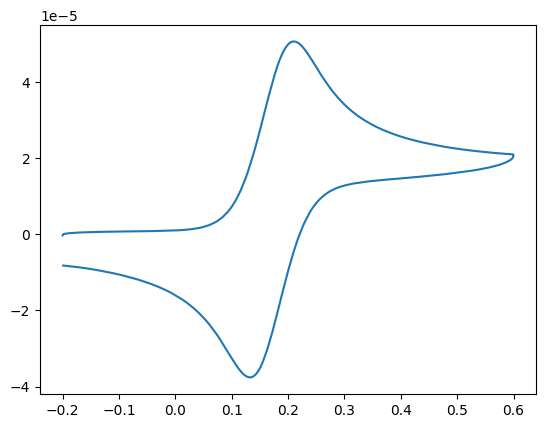

In [4]:
plt.plot(ref_data["Potential_V"], ref_data["Current_A"])

In [5]:
file_list = glob.glob('example/*.csv')  
file_list

['example/MOD FERRO CV -1 to 1.7 V.csv',
 'example/FERRO MOD 9 0.0 to 1.7.csv',
 'example/FERRO BARE.csv',
 'example/data.csv']

ValueError: Could not find 'Potential/V, Current/A' header in file

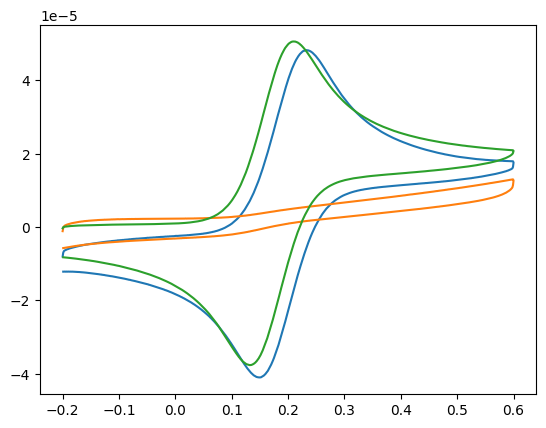

In [ ]:
def get_diff_between_curves(data, ref_data):
    diff = data["Current_A"] - ref_data["Current_A"]
    return np.abs(diff).sum()

def get_min_max_difference(data, ref_data):
    diff = data["Current_A"] - ref_data["Current_A"]
    return diff.max() - diff.min()


metadata_list = []
for file in file_list:
    try:
        meta, data = read_ferro_bare_csv(file)

        plt.plot(data["Potential_V"], data["Current_A"])

        area_diff = get_diff_between_curves(data, ref_data)
        min_max_diff = get_min_max_difference(data, ref_data)

        meta['Area_Difference'] = area_diff
        meta['Min_Max_Difference'] = min_max_diff

        metadata_list.append(meta)
    except:
        None

# Merge all metadata
all_data = pd.concat(metadata_list, ignore_index=True)

In [ ]:
all_data

,"Apr. 16, 2025 17",Technique,File_Path,Data Source,Instrument Model,Init E (V),High E (V),Low E (V),Init P/N,Scan Rate (V/s),Sample Interval (V),Quiet Time (sec),Sensitivity (A/V),Filename,Area_Difference,Min_Max_Difference,"July 1, 2025 13","Sept. 12, 2025 15"
0,05:51,Cyclic Voltammetry,d:\serah 2nd year\16-04-25 l-arg -1 to 1.7 con...,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,0.001,2,0.0001,MOD FERRO CV -1 to 1.7 V.csv,0.006636,0.000018,NaN,NaN
1,NaN,Cyclic Voltammetry,d:\serah 3rd year\02-09-25 l-lysine stability\...,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,0.001,2,0.0001,FERRO MOD 9 0.0 to 1.7.csv,0.021096,0.000082,51:56,NaN
2,NaN,Cyclic Voltammetry,d:\serah 3rd year\02-09-25 l-lysine stability\...,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,0.001,2,0.0001,FERRO BARE.csv,0.000000,0.000000,NaN,54:51
